# Part I - Study of USA flights in 2007 
## by (Ouedraogo Ami Samyra)

## Introduction
> **Introduce the dataset**  
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed. 




## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
#dataset of flight informations
data=pd.read_csv("2007.csv.bz2")
#dataset of carriers informations
carriers=pd.read_csv("carriers.csv")

In [3]:
carriers.sample(10)

,Code,Description
383,COR,Coral Air Inc.
1035,PW,Pacific Western Airlines
1022,PRN,Puerto Rico Intl Airlines
69,7N,Inland Aviation Services
200,API,Arizona Pacific Inc.
912,NRN,Northern Airlines Inc.
816,MB,Samoa Airlines Inc.
1284,TWE,Trans World Express
730,KE,Korean Air Lines Co. Ltd.
1331,VIG,Viking Express


In [4]:
carriers=carriers.rename(columns={'Code':'UniqueCarrier'})
carriers.sample(1)

,UniqueCarrier,Description
190,ANM,Airways Of New Mexico Inc.


In [5]:
#merge to hat the carriers name to the flights informations dataset
df=pd.merge(data,carriers,on='UniqueCarrier',how='left')
#dipslay randomly 10 row of data
df.sample(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Description
3092571,2007,6,7,4,1708.0,1700,1830.0,1825,WN,968,...,10,0,NaN,0,0,0,0,0,0,Southwest Airlines Co.
2015688,2007,4,10,2,1833.0,1840,1915.0,1924,OO,5783,...,8,0,NaN,0,0,0,0,0,0,Skywest Airlines Inc.
6775725,2007,11,30,5,1442.0,1450,1536.0,1554,AS,186,...,11,0,NaN,0,0,0,0,0,0,Alaska Airlines Inc.
6029625,2007,10,3,3,1637.0,1640,1709.0,1725,MQ,4252,...,12,0,NaN,0,0,0,0,0,0,American Eagle Airlines Inc.
577245,2007,1,31,3,1445.0,1455,1750.0,1739,CO,36,...,28,0,NaN,0,0,0,0,0,0,Continental Air Lines Inc.
47321,2007,1,17,3,730.0,730,819.0,830,WN,436,...,10,0,NaN,0,0,0,0,0,0,Southwest Airlines Co.
4858854,2007,8,9,4,1743.0,1722,1919.0,1827,9E,5842,...,17,0,NaN,0,0,21,31,0,0,Pinnacle Airlines Inc.
5500510,2007,9,8,6,1752.0,1755,2010.0,2025,AA,1219,...,9,0,NaN,0,0,0,0,0,0,American Airlines Inc.
7044327,2007,12,21,5,947.0,945,1031.0,1036,OO,5459,...,11,0,NaN,0,0,0,0,0,0,Skywest Airlines Inc.
2867056,2007,5,29,2,2002.0,2005,2228.0,2230,MQ,4345,...,19,0,NaN,0,0,0,0,0,0,American Eagle Airlines Inc.


In [6]:
#display the number of different flight schedule time
df.CRSDepTime.nunique()

1188

In [7]:
#display  ramdomly 10 rows about diverted fligths
df.query('Diverted == 1').sample(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Description
4876292,2007,8,17,5,1336.0,1335,NaN,1635,AA,626,...,8,0,NaN,1,0,0,0,0,0,American Airlines Inc.
3158790,2007,6,28,4,1356.0,1215,NaN,2020,WN,72,...,8,0,NaN,1,0,0,0,0,0,Southwest Airlines Co.
114785,2007,1,10,3,1436.0,1443,NaN,1825,XE,2519,...,17,0,NaN,1,0,0,0,0,0,Expressjet Airlines Inc.
4869378,2007,8,17,5,1834.0,1820,NaN,2030,AA,375,...,9,0,NaN,1,0,0,0,0,0,American Airlines Inc.
4021664,2007,7,29,7,1423.0,1425,NaN,1618,US,919,...,11,0,NaN,1,0,0,0,0,0,US Airways Inc. (Merged with America West 9/05...
3153544,2007,6,26,2,1908.0,1640,NaN,1740,WN,85,...,13,0,NaN,1,0,0,0,0,0,Southwest Airlines Co.
3409285,2007,6,15,5,1325.0,1325,NaN,1521,EV,4223,...,15,0,NaN,1,0,0,0,0,0,Atlantic Southeast Airlines
6332662,2007,11,26,1,1954.0,1650,NaN,1817,XE,2213,...,67,0,NaN,1,0,0,0,0,0,Expressjet Airlines Inc.
1943014,2007,4,20,5,1522.0,1520,NaN,1740,XE,2994,...,27,0,NaN,1,0,0,0,0,0,Expressjet Airlines Inc.
3153291,2007,6,26,2,1703.0,1635,NaN,2135,WN,110,...,10,0,NaN,1,0,0,0,0,0,Southwest Airlines Co.


In [8]:
#display  ramdomly 10 rows about cancceled flights 
df.query('Cancelled == 1').sample(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Description
3229900,2007,6,30,6,NaN,700,NaN,808,YV,2840,...,0,1,A,0,0,0,0,0,0,Mesa Airlines Inc.
711217,2007,2,13,2,NaN,1705,NaN,1821,XE,3094,...,0,1,B,0,0,0,0,0,0,Expressjet Airlines Inc.
7310596,2007,12,17,1,NaN,2102,NaN,2235,9E,5894,...,0,1,A,0,0,0,0,0,0,Pinnacle Airlines Inc.
761088,2007,2,27,2,NaN,1243,NaN,1339,YV,7098,...,0,1,B,0,0,0,0,0,0,Mesa Airlines Inc.
2106315,2007,4,12,4,NaN,1910,NaN,2026,US,663,...,0,1,A,0,0,0,0,0,0,US Airways Inc. (Merged with America West 9/05...
3960139,2007,7,11,3,NaN,1200,NaN,1449,UA,612,...,0,1,A,0,0,0,0,0,0,United Air Lines Inc.
4021701,2007,7,29,7,NaN,1300,NaN,1447,US,1644,...,0,1,C,0,0,0,0,0,0,US Airways Inc. (Merged with America West 9/05...
4194585,2007,7,27,5,NaN,1913,NaN,2048,9E,3741,...,0,1,A,0,0,0,0,0,0,Pinnacle Airlines Inc.
5399162,2007,9,25,2,NaN,800,NaN,850,MQ,3890,...,0,1,A,0,0,0,0,0,0,American Eagle Airlines Inc.
1461712,2007,3,27,2,NaN,1310,NaN,1445,UA,1589,...,0,1,A,0,0,0,0,0,0,United Air Lines Inc.


In [9]:
#check if there is duplicated values
df.duplicated().sum()


27

In [10]:
#check it type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7453215 entries, 0 to 7453214
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay      

In [11]:
#lets checks some statistique value my variable
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7453215.0,7.453215e+06,7.453215e+06,7.453215e+06,7.292467e+06,7.453215e+06,7.275288e+06,7.453215e+06,7.453215e+06,7.275288e+06,...,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06
mean,2007.0,6.514876e+00,1.572589e+01,3.933804e+00,1.339221e+03,1.330596e+03,1.482105e+03,1.495392e+03,2.188099e+03,1.263223e+02,...,7.198058e+02,6.691984e+00,1.630015e+01,2.156761e-02,2.304911e-03,3.865236e+00,7.700904e-01,3.783702e+00,2.373553e-02,5.099134e+00
std,0.0,3.425117e+00,8.781154e+00,1.992267e+00,4.798528e+02,4.647080e+02,5.072241e+02,4.815902e+02,1.971958e+03,7.118009e+01,...,5.623051e+02,5.151351e+00,1.183396e+01,1.452668e-01,4.795413e-02,2.084240e+01,9.619547e+00,1.617670e+01,1.084995e+00,2.127753e+01
min,2007.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007.0,4.000000e+00,8.000000e+00,2.000000e+00,9.300000e+02,9.300000e+02,1.107000e+03,1.115000e+03,5.900000e+02,7.600000e+01,...,3.190000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2007.0,7.000000e+00,1.600000e+01,4.000000e+00,1.329000e+03,1.322000e+03,1.513000e+03,1.520000e+03,1.509000e+03,1.080000e+02,...,5.690000e+02,5.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2007.0,9.000000e+00,2.300000e+01,6.000000e+00,1.733000e+03,1.720000e+03,1.911000e+03,1.906000e+03,3.553000e+03,1.560000e+02,...,9.460000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2007.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.602000e+03,1.270000e+03,...,4.962000e+03,5.450000e+02,5.300000e+02,1.000000e+00,1.000000e+00,2.580000e+03,1.429000e+03,1.386000e+03,3.820000e+02,1.031000e+03


In [12]:
# display the shape of my dataset(number of rows and columns)
df.shape

(7453215, 30)

In [13]:
#number of destination airport 
df.Dest.nunique()

310

In [14]:
#number of departure airport city
df.Origin.nunique()

304

In [15]:
#number of fligh number
df.FlightNum.nunique()

7596

In [16]:
##number of unique carriers concerned
df.UniqueCarrier.nunique()

20

## Data cleaning

#### The data is already almost clean but i have noticed some duplicated values.

In [17]:
# display the shape of my dataset(number of rows and columns)
df.shape

(7453215, 30)

In [18]:
#delete duplicated values
df.drop_duplicates(inplace=True)

In [19]:
# display the shape of my dataset(number of rows and columns)
df.shape

(7453188, 30)

1. Base on the information that i have collected only when Arrival Delay is longer than 15 minutes there's data about what caused the delay. Arrival Delay is the sum of CarrierDelay, WeatherDelay, NASDelay and LateAircraftDelay. In cases of cancelation or diversion there's no data related to delay causes.

In [20]:
#Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)
for dataset in df:
    df.loc[df['ArrDelay'] <= 15, 'Status'] = 0
    df.loc[df['ArrDelay'] >= 15, 'Status'] = 1
    df.loc[df['ArrDelay'] >= 60, 'Status'] = 2
    df.loc[df['Diverted'] == 1, 'Status'] = 3
    df.loc[df['Cancelled'] == 1, 'Status'] = 4
    
#reason for cancellation (A = carrier, B = weather, C = NAS, D = security)   
#Cancellation cause
df.loc[df["CancellationCode"] =="A", 'CancellationCode'] = "0"
df.loc[df["CancellationCode"] =="B", 'CancellationCode'] = "1"
df.loc[df["CancellationCode"] =="C", 'CancellationCode'] = "2"
df.loc[df["CancellationCode"] =="D", 'CancellationCode'] = "3"

### What is the structure of your dataset?

> My dataset contains 7453188 fligts records shared in 31 features from 291 differents departures place to 293 destinations in 2007  !
Features presentations 
- Year 2007
- Month 1-12
- DayofMonth 1-31
- DayOfWeek 1 (Monday) - 7 (Sunday)
- DepTime actual departure time (local, hhmm)
- CRSDepTime scheduled departure time (local, hhmm)
- ArrTime actual arrival time (local, hhmm)
- CRSArrTime scheduled arrival time (local, hhmm)
- UniqueCarrier unique carrier code
- FlightNum flight number
- TailNum plane tail number: aircraft registration, unique aircraft identifier
- ActualElapsedTime in minutes
- CRSElapsedTime in minutes
- AirTime in minutes
- ArrDelay arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).
- DepDelay departure delay, in minutes
- Origin origin IATA airport code
- Dest destination IATA airport code
- Distance in miles
- TaxiIn taxi in time, in minutes
- TaxiOut taxi out time in minutes
- Cancelled was the flight cancelled
- CancellationCode reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
- Diverted 1 = yes, 0 = no
- CarrierDelay in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
- WeatherDelay in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
- NASDelay in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.
- SecurityDelay in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
- LateAircraftDelay in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.


### What is/are the main feature(s) of interest in your dataset?

> which factors influence the most Aiplane delay or cancellation ?
based on that my interest features are  Canceled ,DepDelay                                    

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I except that Month with will be related to WeatherDelay ,because weather is related to the season which depends on months. I also believe that cancelled factor is related to the season ,so related to my variable month but can also be influenced by the airport location.

> almost all of the feature are important based on the main interest features except three of them  [Year,TaxiIn,TaxiOut]!

 



In [21]:
#delete of unnecesseray columns
flights=df[df.columns.drop(['Year','TaxiIn','TaxiOut','Diverted'])]
flights.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Description,Status
0,1,1,1,1232.0,1225,1341.0,1340,WN,2891,N351,...,389,0,NaN,0,0,0,0,0,Southwest Airlines Co.,0.0
1,1,1,1,1918.0,1905,2043.0,2035,WN,462,N370,...,479,0,NaN,0,0,0,0,0,Southwest Airlines Co.,0.0
2,1,1,1,2206.0,2130,2334.0,2300,WN,1229,N685,...,479,0,NaN,3,0,0,0,31,Southwest Airlines Co.,1.0
3,1,1,1,1230.0,1200,1356.0,1330,WN,1355,N364,...,479,0,NaN,23,0,0,0,3,Southwest Airlines Co.,1.0
4,1,1,1,831.0,830,957.0,1000,WN,2278,N480,...,479,0,NaN,0,0,0,0,0,Southwest Airlines Co.,0.0


In [22]:
len(flights.query('DepDelay<0')['DepDelay'])*100/len(flights)
###DepDelay instead of using ArrDelay

47.24699014703507

## Univariate Exploration



I'll start by looking at the proportion  of the main variable of interest: cancelled

In [23]:
#set the parameter of my visual
def set_rcparams(params):
    f = plt.figure()
    plt.plot()
    plt.close(f)
    plt.rcParams.update(**params)
set_rcparams({"figure.figsize": (15, 8)})

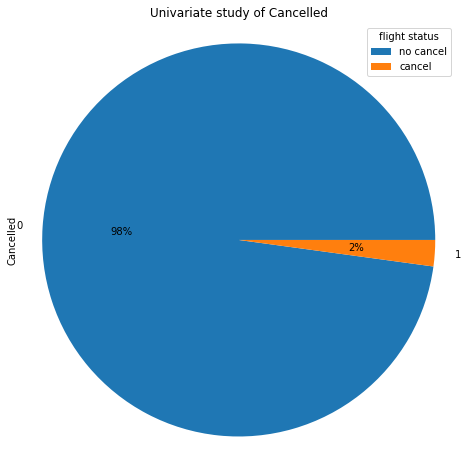

In [24]:
plt.figure(figsize=(10,8))
plt.title("Univariate study of Cancelled")
flights.Cancelled.value_counts().plot(kind='pie',autopct='%.0f%%')
plt.axis('square')
plt.legend(title="flight status",labels=['no cancel','cancel'])
plt.show()

We can noticed that just a few number of flights has been deleted in 2007 ,exactly 2% of the whole. Our dataset is greatly unbalanced.
Next up, the first predictor variable of interest: ArrDelay 

C:\Users\ouedr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


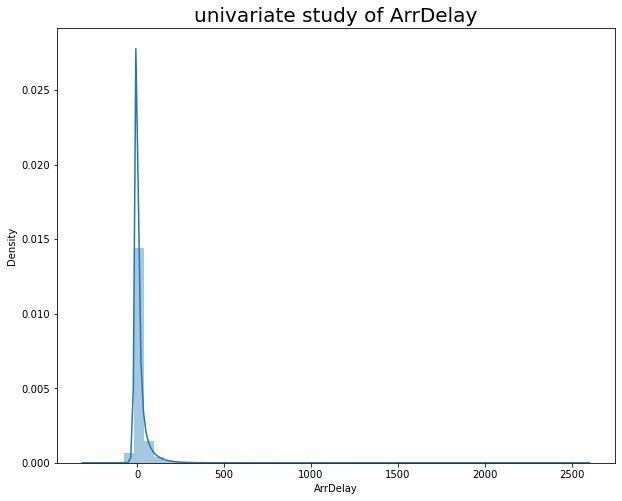

In [25]:
plt.figure(figsize=(10,8))
plt.title("univariate study of ArrDelay",fontsize=20)
sb.distplot(flights.ArrDelay.dropna())
plt.show()

univariate analysis of Arrival delays shows that are they are concentrate in the left side that means that the majority of delays are short, and the longer delays, while unusual, are more heavy loaded in time. 
Notice that ArrDelay is the sum of all delays of (weather ,security, ...) 

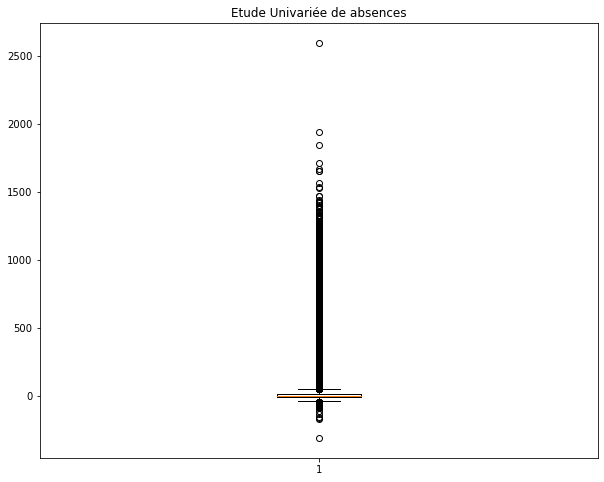

In [26]:
plt.figure(figsize=(10,8))
plt.title("Etude Univariée de absences")
plt.boxplot(x=flights.ArrDelay.dropna())
plt.show()

In [27]:
flights.ArrDelay.describe()

count    7.275261e+06
mean     1.019221e+01
std      3.930780e+01
min     -3.120000e+02
25%     -9.000000e+00
50%      0.000000e+00
75%      1.400000e+01
max      2.598000e+03
Name: ArrDelay, dtype: float64

we can easily distinguish  easily there some positive an negative outliers , in fact that make sens since sometimes a flight departure time can be change to earlier but the companie make sure to send an email to the passenger .Also i can be sometime delay due to weather and so on.

In [28]:
flights.query('ArrDelay <0 ').describe()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,ArrDelay,DepDelay,Distance,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Status
count,3.618454e+06,3.618454e+06,3.618454e+06,3.618454e+06,3.618454e+06,3.618454e+06,3.618454e+06,3.618454e+06,3.618454e+06,3.618454e+06,...,3.618454e+06,3.618454e+06,3.618454e+06,3618454.0,3618454.0,3618454.0,3618454.0,3618454.0,3618454.0,3618454.0
mean,6.576204e+00,1.560310e+01,3.934976e+00,1.265209e+03,1.272723e+03,1.423277e+03,1.437295e+03,2.159828e+03,1.188940e+02,1.266296e+02,...,-1.031713e+01,-2.581569e+00,7.145334e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,3.399049e+00,8.856715e+00,2.010204e+00,4.681000e+02,4.659387e+02,4.761863e+02,4.780136e+02,1.962730e+03,6.822007e+01,7.035697e+01,...,7.248213e+00,4.927932e+00,5.618464e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01,1.900000e+01,...,-3.120000e+02,-3.050000e+02,3.000000e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4.000000e+00,8.000000e+00,2.000000e+00,8.480000e+02,8.500000e+02,1.030000e+03,1.040000e+03,5.750000e+02,7.100000e+01,7.700000e+01,...,-1.400000e+01,-5.000000e+00,3.140000e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,7.000000e+00,1.500000e+01,4.000000e+00,1.225000e+03,1.230000e+03,1.411000e+03,1.420000e+03,1.494000e+03,1.010000e+02,1.090000e+02,...,-9.000000e+00,-3.000000e+00,5.620000e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.000000e+01,2.300000e+01,6.000000e+00,1.643000e+03,1.645000e+03,1.818000e+03,1.826000e+03,3.320000e+03,1.470000e+02,1.560000e+02,...,-5.000000e+00,0.000000e+00,9.450000e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.359000e+03,9.602000e+03,6.610000e+02,6.600000e+02,...,-1.000000e+00,1.190000e+02,4.962000e+03,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 I will move now on the  variable  status: which allow us to classify  flight in in five category  "on time", "slightly delayed", "highly delayed ", "diverted", "cancelled".

In [29]:
## countplot reusable function
def countplot(title,x,ticklabels):
    plt.title(title,fontsize=20)
    g=sb.countplot(x=x)
    g.set_xticklabels(ticklabels)
    plt.show();

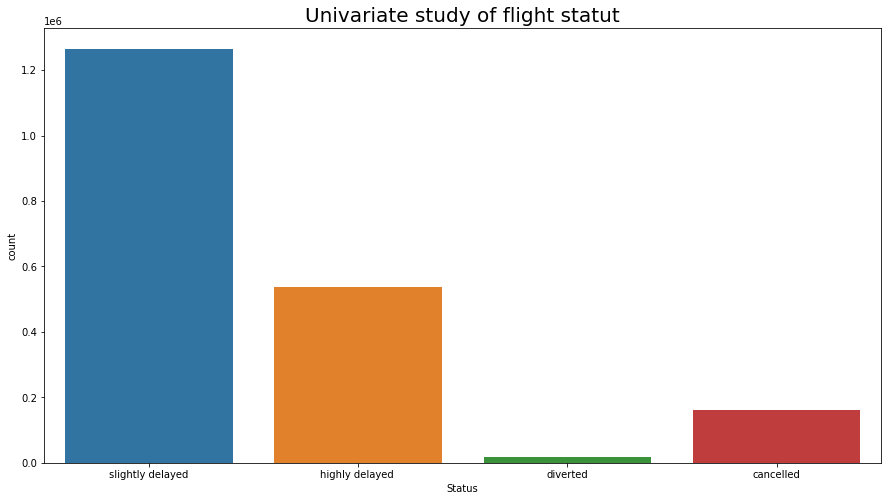

In [30]:
flights_sub=flights.query('Status != 0')
countplot("Univariate study of flight statut",flights_sub.Status,[ "slightly delayed", "highly delayed ", "diverted", "cancelled"])

we can clearly noticed that in 2007 few number of flights has been diverted  compare to the number or cancelled flight and slightly or highly delayed flights

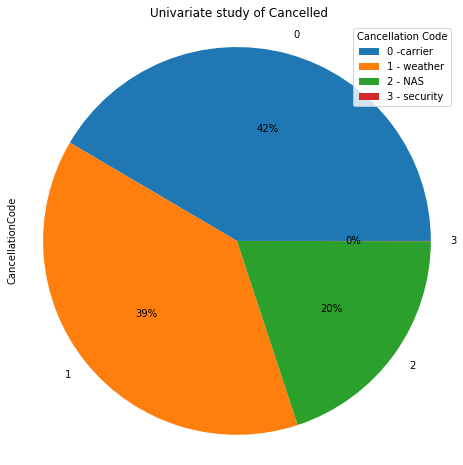

In [31]:

plt.figure(figsize=(10,8))
plt.title("Univariate study of Cancelled")
flights.CancellationCode.value_counts().plot(kind='pie',autopct='%.0f%%')
plt.axis('square')
plt.legend(title="Cancellation Code",labels=['0 -carrier','1 - weather','2 - NAS', '3 - security'])
plt.show()

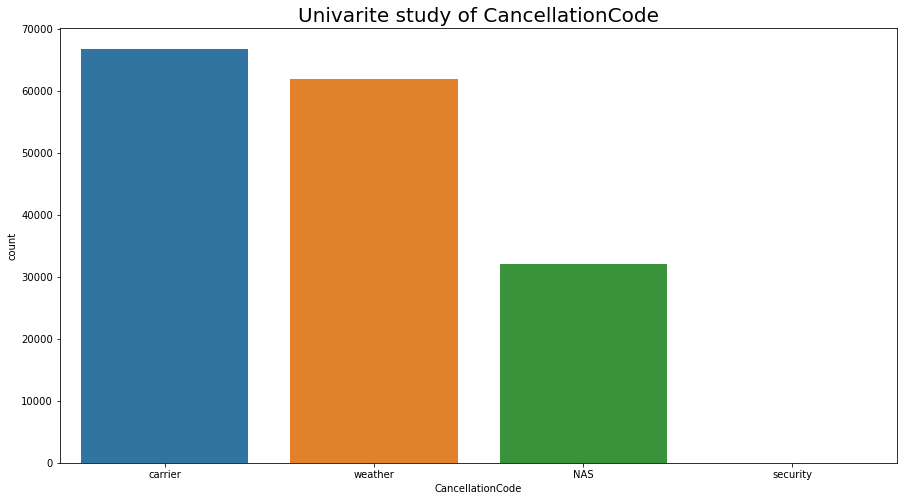

In [32]:

countplot("Univarite study of CancellationCode",flights.CancellationCode,[ 'carrier', 'weather', "NAS", "security"])



 our analysis shows that most of the delays are carrier or  weather  related

I'll now look at the other features in the data to see if any of them hold interesting properties.

In [33]:
flights.Distance.describe()

count    7.453188e+06
mean     7.198048e+02
std      5.623055e+02
min      1.100000e+01
25%      3.190000e+02
50%      5.690000e+02
75%      9.460000e+02
max      4.962000e+03
Name: Distance, dtype: float64

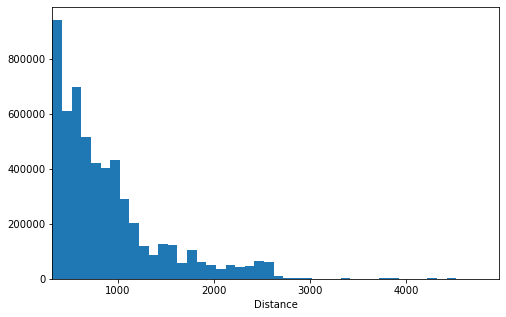

In [34]:
# plotting carat on a standard scale
binsize = 100
bins = np.arange(319, flights.Distance.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = flights, x = 'Distance', bins = bins)
plt.xlim([319,flights.Distance.max()])
plt.xlabel('Distance')
plt.title("",fontsize=20)
plt.show()

 univariate analysis of distance shows  that are concentrate in the left side that means that the majority of distance are short  between 319 miles and 946 miles

In [35]:
#plt.figure(figsize=(10,8))
#plt.title("Etude Univariée de Distance")
#plt.boxplot(x=flights.Distance)
#plt.show()

In [36]:
flights.query("Distance>2000").sample(5)


,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Description,Status
4866296,8,26,7,1446.0,1450,2258.0,2310,AA,284,N373AA,...,2556,0,NaN,0,0,0,0,0,American Airlines Inc.,0.0
831413,2,20,2,751.0,754,1152.0,1129,UA,173,N520UA,...,2704,0,NaN,0,0,23,0,0,United Air Lines Inc.,1.0
3986599,7,9,1,1127.0,1126,1933.0,1936,US,50,N678AW,...,2248,0,NaN,0,0,0,0,0,US Airways Inc. (Merged with America West 9/05...,0.0
4102950,7,25,3,2224.0,2205,640.0,615,HA,4,N597HA,...,2556,0,NaN,19,0,0,0,6,Hawaiian Airlines Inc.,1.0
7115010,12,11,2,1316.0,1320,2213.0,2139,US,912,N121UW,...,2521,0,NaN,0,0,34,0,0,US Airways Inc. (Merged with America West 9/05...,1.0


In [37]:
flights.query("Distance>4000").sample(5)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Description,Status
5598796,9,13,4,1753.0,1800,831.0,854,DL,850,N833MH,...,4502,0,NaN,0,0,0,0,0,Delta Air Lines Inc.,0.0
1805618,3,12,1,2321.0,2145,1500.0,1310,CO,14,N59053,...,4962,0,NaN,96,0,14,0,0,Continental Air Lines Inc.,2.0
5570421,9,22,6,2126.0,2135,1253.0,1310,CO,14,N76054,...,4962,0,NaN,0,0,0,0,0,Continental Air Lines Inc.,0.0
2435848,4,12,4,1619.0,1630,646.0,705,DL,512,N828MH,...,4433,0,NaN,0,0,0,0,0,Delta Air Lines Inc.,0.0
1805875,3,1,4,1550.0,1545,2037.0,2049,DL,365,N832MH,...,4502,0,NaN,0,0,0,0,0,Delta Air Lines Inc.,0.0


 we can clearly see outliers Staring by 2000 miles kilometers miles  

In [38]:
# let's start with the major dimensions of the diamonds, with x, y, and z.
Delaysinfo=flights[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','Distance','Status']]
Delaysinfo=Delaysinfo.dropna()

Delaysinfo.sample(10)

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Distance,Status
4887002,0,0,0,0,0,1162,0.0
6052964,0,0,0,0,0,1953,0.0
4450085,0,0,0,0,0,1201,0.0
1799596,0,0,0,0,0,1628,0.0
5429650,0,0,0,0,0,324,0.0
1611765,0,0,0,0,0,607,0.0
2986651,0,0,0,0,0,190,0.0
3022522,0,0,0,0,0,2248,0.0
4986354,35,0,9,0,0,403,1.0
3631564,0,0,1,0,132,213,2.0


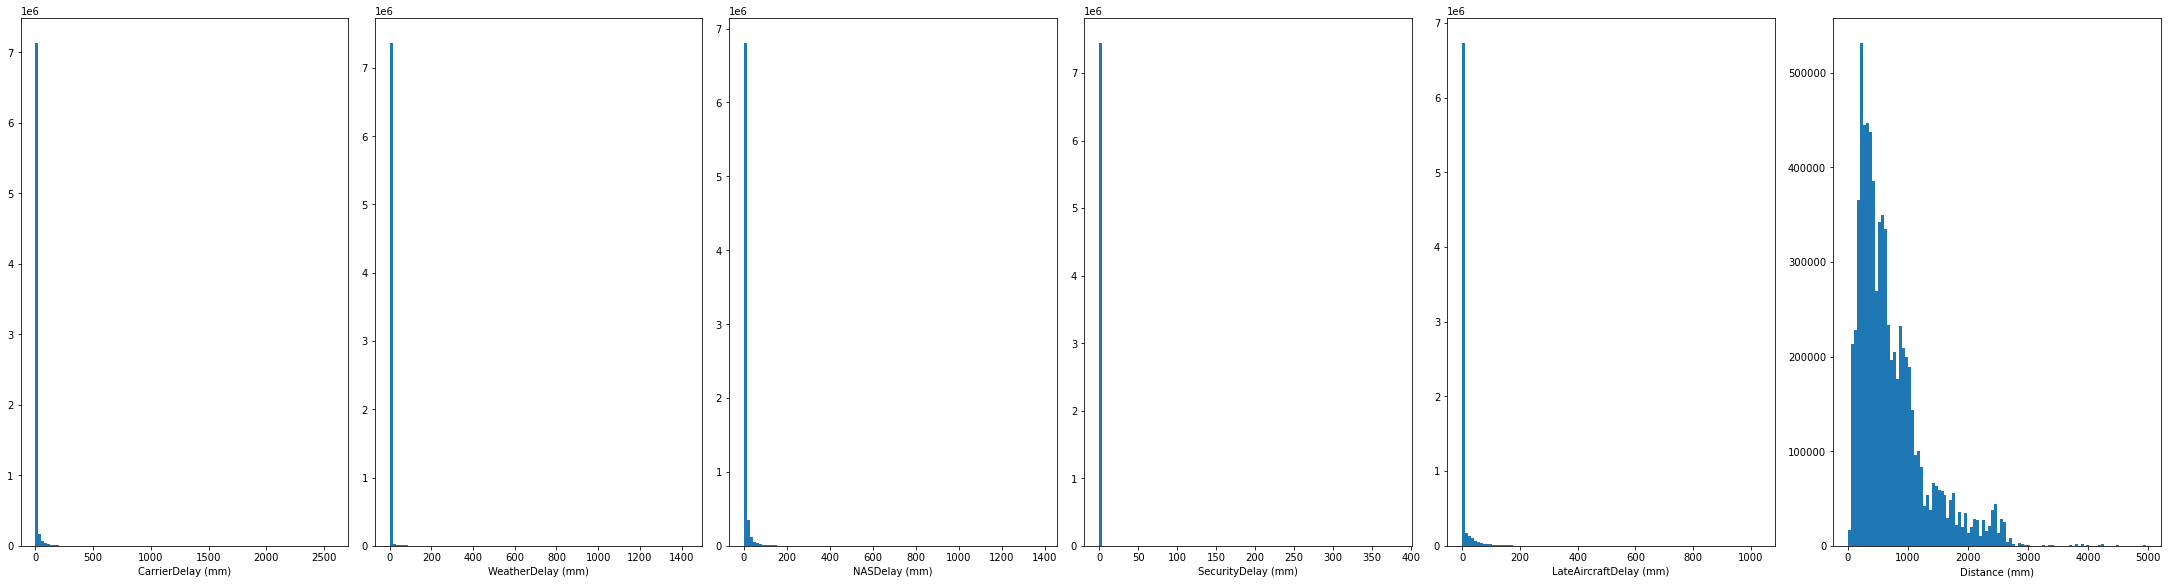

In [39]:
fig, ax = plt.subplots(ncols=6, figsize = [30,8],constrained_layout = True)
variables = ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','Distance']
for i in range(len(variables)):
    var = variables[i]
    #bins = np.arange(min(Delaysinfo[var]), max(Delaysinfo[var])+0.2, 0.2)
    ax[i].hist(data = Delaysinfo, x = var, bins = 100)
    ax[i].set_xlabel('{} (mm)'.format(var))
plt.show()


We can see directly from the majority of the data that they are concentrated on the left side, however we have a high frequency of zeros which is explained by the fact that more than 98% of the flights had no delay in 2007 in the USA, so most of our delay variables are equal to zero.
To better observe the data the best way would be to get rid of these zeros.

In [40]:
# display the 1 and 3 quartile of each variable and use them as a reference 
#for my histograms
LateAircraftDelayData=Delaysinfo.query("LateAircraftDelay>0")
LateAircraftDelayData.LateAircraftDelay.describe()

count    838599.000000
mean         45.319565
std          46.914676
min           1.000000
25%          16.000000
50%          30.000000
75%          58.000000
max        1031.000000
Name: LateAircraftDelay, dtype: float64

In [41]:
WeatherDelayData=Delaysinfo.query("WeatherDelay>0")
WeatherDelayData.WeatherDelay.describe()

count    127849.000000
mean         44.893969
std          58.426742
min           1.000000
25%          11.000000
50%          25.000000
75%          56.000000
max        1429.000000
Name: WeatherDelay, dtype: float64

In [42]:
NASDelayData=Delaysinfo.query("NASDelay>0")
NASDelayData.NASDelay.describe()

count    1.044252e+06
mean     2.700560e+01
std      3.522253e+01
min      1.000000e+00
25%      8.000000e+00
50%      1.700000e+01
75%      3.000000e+01
max      1.386000e+03
Name: NASDelay, dtype: float64

In [43]:
SecurityDelayData=Delaysinfo.query("SecurityDelay>0")
SecurityDelayData.describe()

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Distance,Status
count,9269.000000,9269.000000,9269.000000,9269.000000,9269.000000,9269.000000,9269.000000
mean,0.721221,0.046068,6.730607,19.085770,13.212213,826.139821,1.156759
std,9.422523,1.329966,12.858180,24.142275,27.296458,612.332895,0.363593
min,0.000000,0.000000,0.000000,1.000000,0.000000,31.000000,1.000000
25%,0.000000,0.000000,0.000000,7.000000,0.000000,347.000000,1.000000
50%,0.000000,0.000000,0.000000,13.000000,0.000000,643.000000,1.000000
75%,0.000000,0.000000,9.000000,21.000000,16.000000,1086.000000,1.000000
max,587.000000,75.000000,285.000000,382.000000,508.000000,4962.000000,2.000000


In [44]:
CarrierDelayData=Delaysinfo.query("CarrierDelay>0")
CarrierDelayData.CarrierDelay.describe()

count    814918.000000
mean         35.351282
std          53.478901
min           1.000000
25%          10.000000
50%          20.000000
75%          40.000000
max        2580.000000
Name: CarrierDelay, dtype: float64

In [45]:
DistanceData=Delaysinfo.query("Distance>0")
DistanceData.Distance.describe()

count    7.453188e+06
mean     7.198048e+02
std      5.623055e+02
min      1.100000e+01
25%      3.190000e+02
50%      5.690000e+02
75%      9.460000e+02
max      4.962000e+03
Name: Distance, dtype: float64

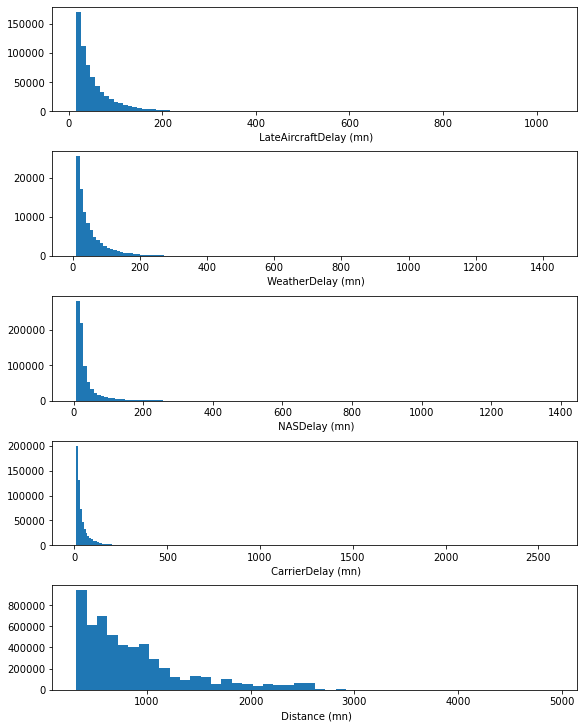

In [46]:
fig, ax = plt.subplots(nrows=5, figsize = [8,10],constrained_layout = True)

variables = ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','Distance']


bins = np.arange(16, max(LateAircraftDelayData.LateAircraftDelay)+8, 10)
ax[0].hist(x=LateAircraftDelayData.LateAircraftDelay,bins=bins)
ax[0].set_xlabel(' LateAircraftDelay (mn)')

WeatherDelayData=Delaysinfo.query("WeatherDelay>0")
bins = np.arange(11, max(WeatherDelayData.WeatherDelay)+8, 10)
ax[1].hist(x=WeatherDelayData.WeatherDelay,bins=bins)
ax[1].set_xlabel(' WeatherDelay (mn)')


bins = np.arange(8, max(NASDelayData.NASDelay)+2,10)
ax[2].hist(x=NASDelayData.NASDelay,bins=bins)
ax[2].set_xlabel(' NASDelay (mn)')




bins = np.arange(10, max(CarrierDelayData.CarrierDelay)+8, 10)
ax[3].hist(x=CarrierDelayData.CarrierDelay,bins=bins)
ax[3].set_xlabel(' CarrierDelay (mn)')



bins = np.arange(319, max(DistanceData.Distance)+10, 100)
ax[4].hist(x=DistanceData.Distance,bins=bins)
ax[4].set_xlabel(' Distance (mn)')
plt.show()




univariate analysis of Delays variables  shows that are that are concentrate in the left side that means that the majority of delays are short, and the longer delays, while unusual, are more heavy loaded in time.

About Distance variable ,our observations can lead us to the conclusion that since most the value are concentrated in the left side ,most the flight are short distance most precisly they concentrated between 319 an 946 based on the describe code above.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I observed almost no irregularities for the cancelled variable, but my data contains much less information about cancelled flights.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> For a better study of the flight delays I created a new status variable that allows to classify the flights from on time to cancelled..
- I also noticed that the distribution of delays whatever the reason (weather, security ...) was concentrated on the left but since most of the flight in the dataset was on time there was more zeros values in my dataset,then, i took individual delete the zeros rows so i could plot them correctly on histogramm.



In [47]:
# Bring only the nuemric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_column_names = flights.select_dtypes(include=numerics).columns
print(numeric_column_names, '\n')

# Bring only the object columns (strings)
objects = 'object'
object_column_names = flights.select_dtypes(include=objects).columns
print(object_column_names, '\n')

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'Cancelled',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'Status'],
      dtype='object') 

Index(['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode',
       'Description'],
      dtype='object') 



## Bivariate Exploration


lets try to detect some correlation using heatmap

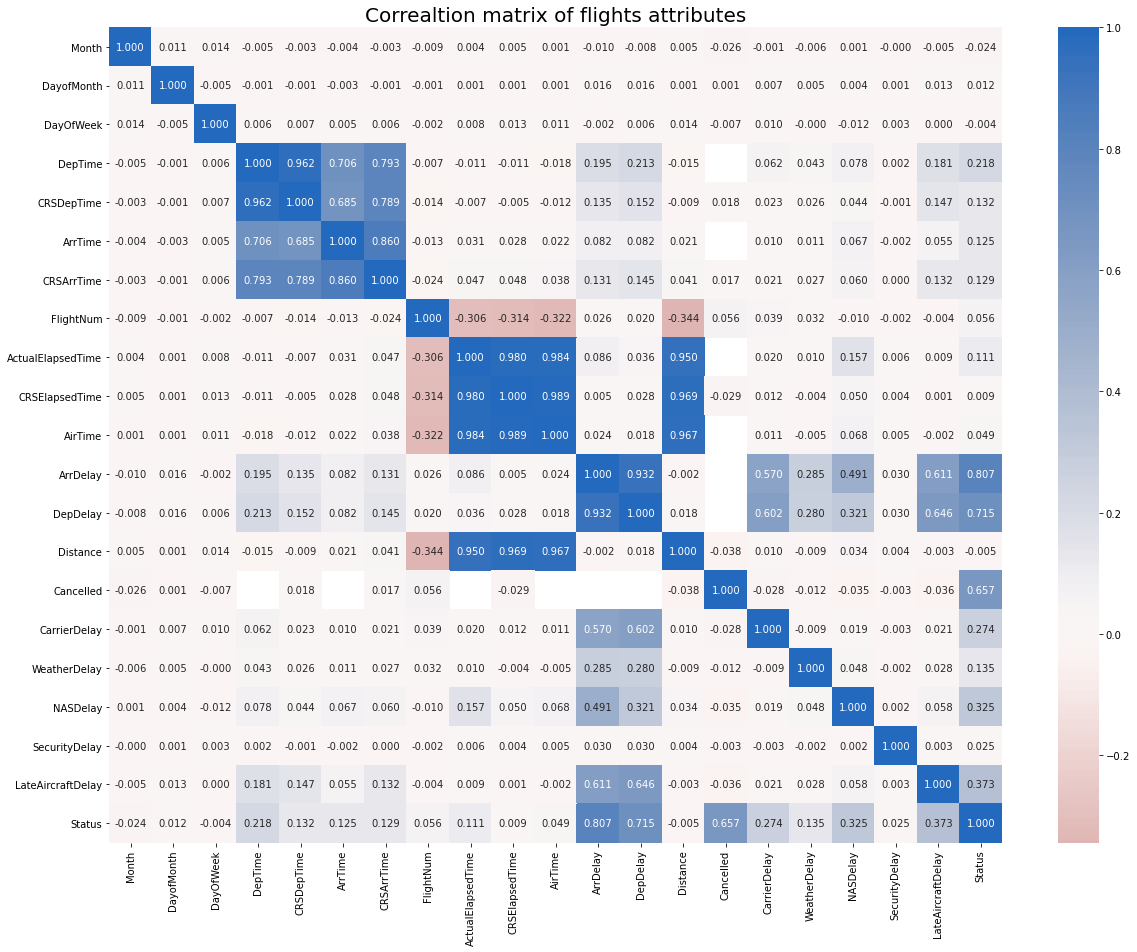

In [48]:
# correlation plot
plt.figure(figsize = [20, 15])
sb.heatmap(flights[numeric_column_names].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.title("Correaltion matrix of flights attributes",fontsize=20)
plt.show()

flights.shape= (7453188, 27)
flights_samp.shape= (7453188, 27)


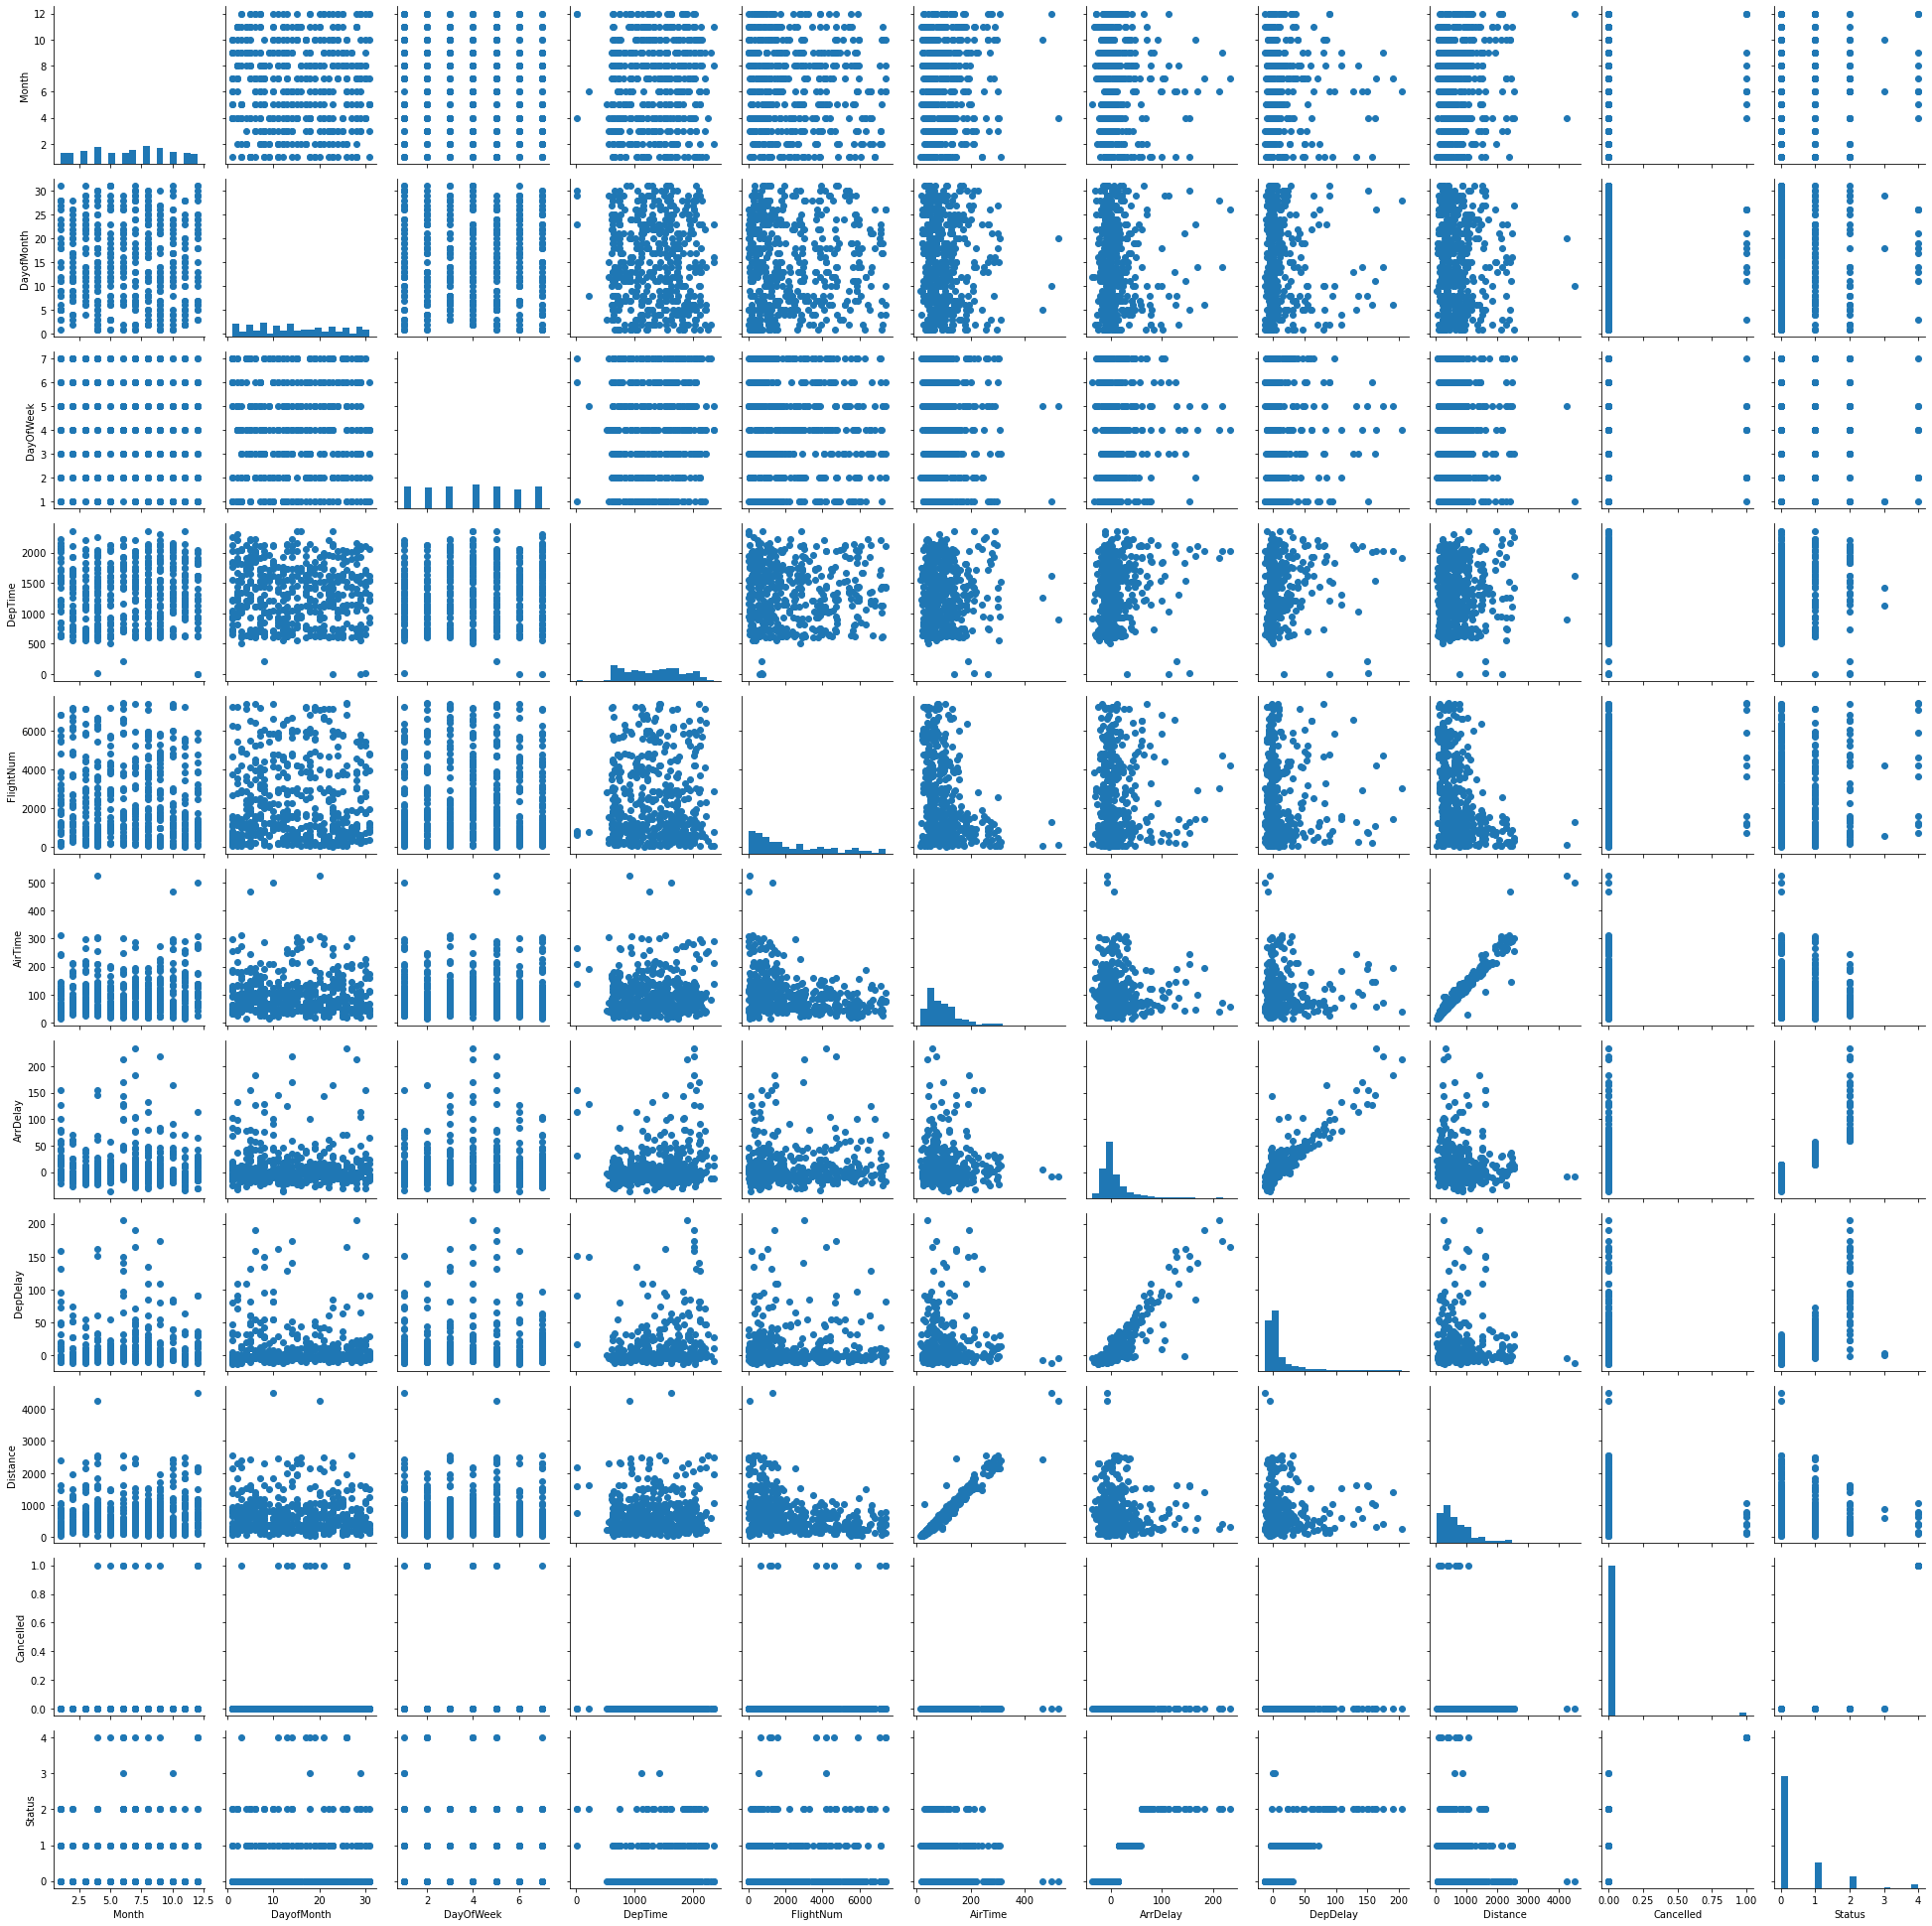

In [49]:
# plot matrix: sample 500 diamonds so that plots are clearer and they render faster
print("flights.shape=",flights.shape)
flights_samp = flights.sample(n=500, replace = False)
print("flights_samp.shape=",flights.shape)
num_values=['Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
        'FlightNum','AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'Cancelled', 'Status']
g = sb.PairGrid(data = flights_samp, vars = num_values)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

It seems to have linear relationship between ArrTime and Distance ,depDelay and ArrDelay which make se

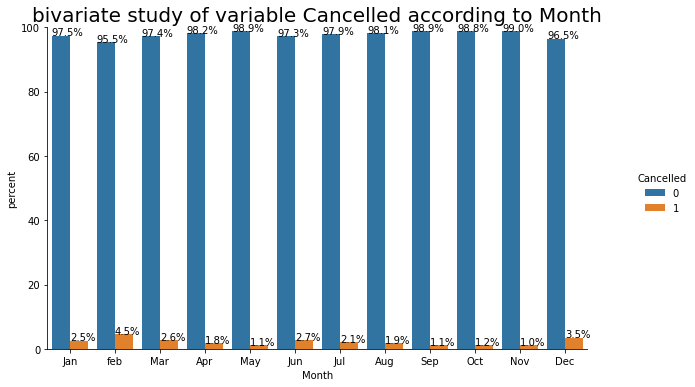

In [50]:

x,y = "Month", "Cancelled"
df1 =flights.groupby(x)["Cancelled"].value_counts(normalize = True)
df1 = df1.mul(100)
df1 =df1.rename("percent").reset_index()
g =sb.catplot(x =x , y="percent", hue = y, kind ="bar", data =df1)

g.ax.set_ylim(0,100)
g.fig.set_size_inches(10, 5)
g.set_xticklabels(['Jan','feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title("bivariate study of variable Cancelled according to Month",fontsize=20)
for p in g.ax.patches:
    txt =str(p.get_height().round(1)) + "%"
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x, txt_y,txt)
    


most of the cancelled flight occured in the second month of year in February,following by december and we notice less cancelled in 2007 occured in November ,May and october but seems like that it can be difficults to see a relationship between flight canceled with season with bar plot so lets try a line plot instead.

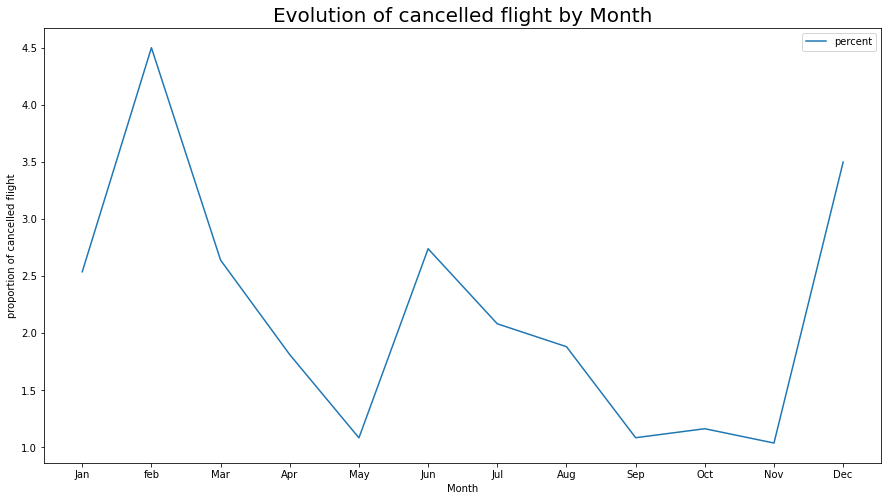

In [51]:
df1.query("Cancelled==1")[['Month','percent']].plot(x='Month',y='percent')
plt.xlabel('Month')
plt.ylabel('proportion of cancelled flight')
plt.title("Evolution of cancelled flight by Month",fontsize=20)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']);


We can notice three importants pics. The former happens in February with the greatest number of flights, later comes another one in June et last one in December but, an overall interpretation of this result will be as follows:
Starting from January 2007 with a proportion of canceled flights of 2.5, we noticed the greatest augmentation of canceled flights during 2007 in February which, was followed by a decrease in proportion until May when the trend changed and we observed another pic lower than the first with a fast decrease until July the proportion of canceled flight decrease slightly and went to decrease fast until September.
From September to November, which is the spring season we notice that the proportion is around 1, and the augmentation trend restarts until the second highest proportion in December.



In [52]:
# transform  year ,Month,DayofMonth intp date format 
flights['FlightDate']= pd.to_datetime(2007*10000+flights.Month*100+flights.DayofMonth,format='%Y%m%d')

<ipython-input-52-87c63f6793d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights['FlightDate']= pd.to_datetime(2007*10000+flights.Month*100+flights.DayofMonth,format='%Y%m%d')


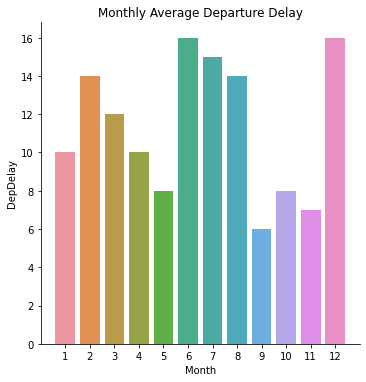

In [53]:
# Monthly Average Departure  Delay

monthly_delay = flights.groupby(['Month'], as_index=False).agg({'DepDelay': 'mean'})
monthly_delay['DepDelay']=np.round(monthly_delay['DepDelay'],0)
sb.catplot(x='Month', y='DepDelay',data=monthly_delay, kind='bar')
plt.title("Monthly Average Departure Delay") 
plt.plot()
plt.show()

 we notice that we have the delay average is most important from june to August  and also in December. We can surmise that because of the starting of summer, we have a high departure delay from june to august ,this period also correspond to students holidays , for high value in December it can be explain by the end of year celebration.

In [54]:
cancelledflight=flights.query('Cancelled==0')

In [55]:
cancelledflight.DepDelay.describe()

count    7.292440e+06
mean     1.139917e+01
std      3.614195e+01
min     -3.050000e+02
25%     -4.000000e+00
50%      0.000000e+00
75%      1.100000e+01
max      2.601000e+03
Name: DepDelay, dtype: float64

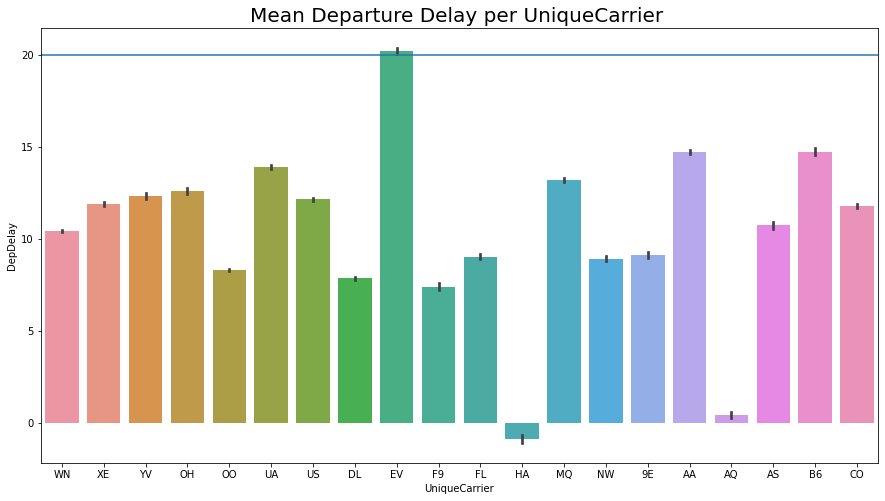

In [56]:
#data=cancelledflight.query('DepDelay >80')
#cancelledflight_sub
#Origin  AND  Dest,facegrid,cancelled 
sb.barplot(data=cancelledflight,y='DepDelay',x='UniqueCarrier');
plt.title("Mean Departure Delay per UniqueCarrier ",fontsize=20)
plt.axhline(y=20);


we can observe that Departure delay is different for every airlines we can observe that airlines which observe more delays was Atlantic Southeast Airlines .

In [57]:
flights.groupby(['UniqueCarrier']).DepDelay.mean().sort_values(ascending=False)


UniqueCarrier
EV    20.220919
B6    14.739054
AA    14.720478
UA    13.906784
MQ    13.193237
OH    12.607671
YV    12.328270
US    12.145770
XE    11.875999
CO    11.788123
AS    10.733889
WN    10.436627
9E     9.109935
FL     9.035036
NW     8.926700
OO     8.307150
DL     7.854057
F9     7.412113
AQ     0.438702
HA    -0.882958
Name: DepDelay, dtype: float64

In [58]:
flights.groupby(['UniqueCarrier']).DepDelay.median().sort_values(ascending=False)


UniqueCarrier
EV    2.0
WN    1.0
US    1.0
YV    0.0
F9    0.0
AA    0.0
OH    0.0
UA   -1.0
XE   -1.0
AS   -1.0
B6   -1.0
CO   -1.0
DL   -1.0
FL   -1.0
MQ   -1.0
9E   -2.0
OO   -2.0
NW   -2.0
AQ   -3.0
HA   -4.0
Name: DepDelay, dtype: float64

I try to display the median of delay and the mean for each carriers to avoid my analysis to be influenced by the greatest or  the smallest flight delay values  ,and i noticed a difference  in the the middle of my lists but i still have Atlantic Southeast Airlines (EV) being the carriers that register the most departure delays and (Hawaiian Airlines Inc) Ha the less. 

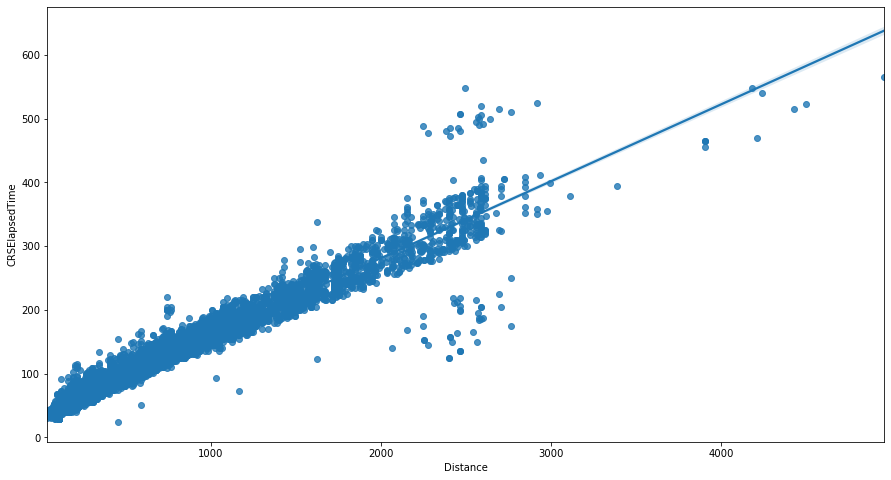

In [59]:
data=cancelledflight.sample(10000)
#cancelledflight_sub
#Origin  AND  Dest,facegrid,cancelled 
sb.regplot(data=data,x='Distance',y='CRSElapsedTime');


there is a strong relation betwenn Distance and CRSElapsedtime ,the more flight distance is high ,the more CRSElapsedtime is high.
we can conclude that the Airlines companies calculate the CRSElapsedtime based on the flights' distance

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> My investigation shows a relationship between the  month  , the number of cancelled flight that can be assimilated to influenced of weather .In fact i have notice tree important peak that could correspond to specific season in year ,the first on was in february (Spring),the second in june (summer) and the last in december(winter) that can allow us with more investigation to allow the company to  pay attention those period of year to maybe prevent flight cancellation.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Expected relationships were found in the association between distance and CRSE elapsed time, we might think that CRSE elapsed time could be estimated based on flight distance, which would make perfect sense. The greater the distance, the longer we have to take to reach our destination.

## Multivariate Exploration

> The main thing I want to explore in this part of the analysis is how the three categorical measures of month play into the relationship between Depature delay and Carriers

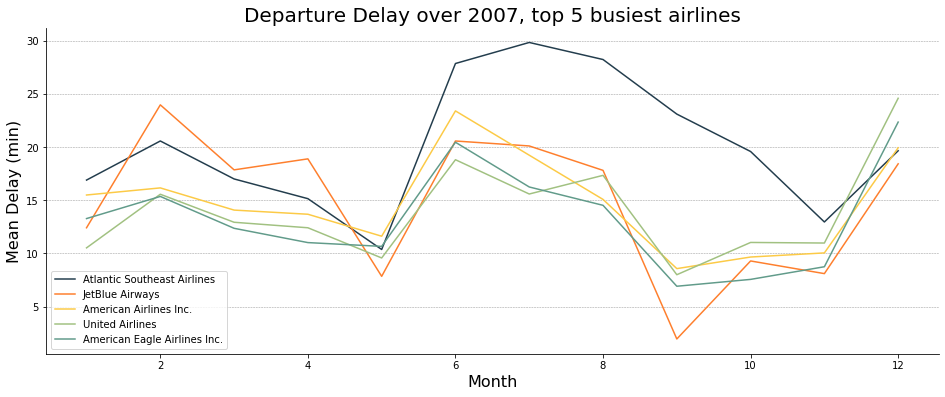

In [60]:
# Plot 5 timelines for top 5 carriers with the most of departure delays
airline_names = {'EV': 'Atlantic Southeast Airlines', 'B6': 'JetBlue Airways', 'AA':'American Airlines Inc.', 'UA': 'United Airlines',
                 'MQ': 'American Eagle Airlines Inc.'}

top5_airlines = [{'airline':'EV', 'color':'#233d4d'},
                 {'airline':'B6', 'color':'#fe7f2d'},
                 {'airline':'AA', 'color':'#fcca46'},
                 {'airline':'UA', 'color':'#a1c181'},
                 {'airline':'MQ', 'color':'#619b8a'}]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

def plot_delay(params):
    """ Plot carrier delay using given code and color, and return plot artist. """
    means = flights[flights['UniqueCarrier'] == params['airline']].groupby(['Month']).mean().reset_index() 
    artist, = plt.plot(means['Month'], means['DepDelay'], linestyle='solid', color=params['color'])
    return artist

fig, ax = plt.subplots(figsize=(16, 6))
delay_handles = list(map(plot_delay, top5_airlines))
delay_labels = list(map(lambda params: airline_names[params['airline']], top5_airlines))

plt.legend(delay_handles, delay_labels)
plt.grid(axis='y', color='#999999', linestyle = '--', linewidth = 0.5)
sb.despine(top=True)
ax.set_ylabel('Mean Delay (min)', fontsize=16)
ax.set_xlabel('Month', fontsize=16)
#plt.xticks(months)
ax.set_title("Departure Delay over 2007, top 5 busiest airlines" , fontsize=20);


Over 2007 Considering the top five airlines that register more delays ,I can here see that those airlines have registered  the most high delay in the period from May to August ,which is considerd as the summer season ,we can surmised that it might have more passengers to handle this periods because it is holidays period for student so the Airlines might have to deals with differents situations

In [61]:

# Prepare dataset to plot reasons of delay as categories

month_delays = flights.groupby('Month').mean().reset_index()


In [62]:
tdrop = ['DayofMonth', 'DayOfWeek', 'ArrDelay', 'SecurityDelay']
month_delays = month_delays[["Month","WeatherDelay","NASDelay","CarrierDelay","LateAircraftDelay"]]
month_delays['Month'] = month_delays['Month'].astype(str).str.zfill(2)

month_tidy = month_delays.melt(id_vars='Month').sort_values('Month')

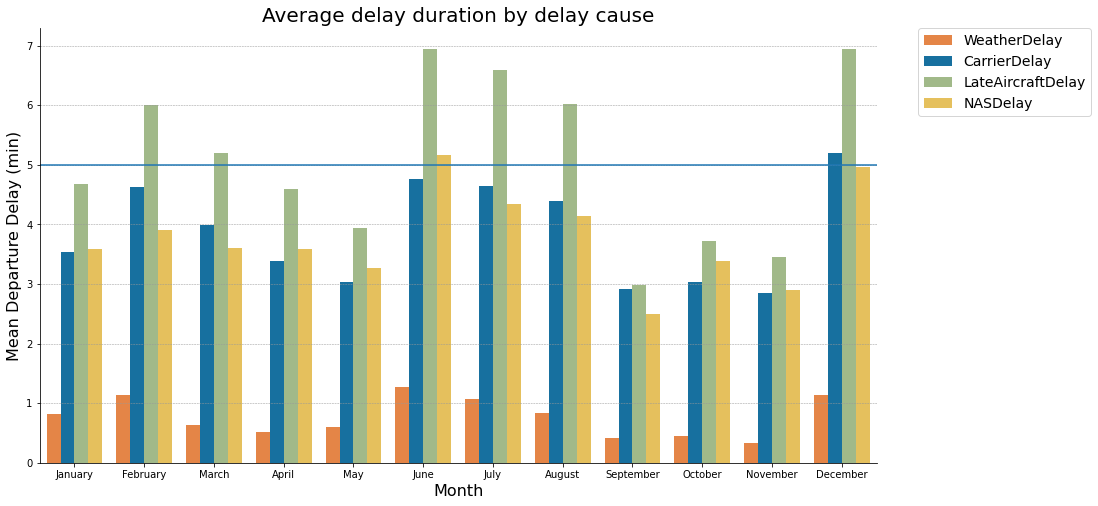

In [63]:
# Plot mean delays by the reasons and DepDelay to compare

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
del_colors = ['#fe7f2d', '#0077b6', '#a1c181', '#fcca46', '#619b8a']

plt.figure(figsize = [15, 8])
ax = sb.barplot(data = month_tidy, x = 'Month', y = 'value', hue = 'variable', palette=del_colors)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)
ax.set_xticklabels(months)
ax.set_ylabel('Mean Departure Delay (min)', fontsize=16)
ax.set_title('Average delay duration by delay cause', fontsize=20)
ax.set_xlabel('Month', fontsize=16)
plt.grid(axis='y', color='#999999', linestyle = '--', linewidth = 0.5)
sb.despine();
plt.axhline(y=5);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation of impact of period of year(month) against  departure delays in this section by looking at the trend for differents top 5 busiest airlines . The multivariate exploration here showed that the period of year does impact the delays events and the lenght of delay is different from ariline to airline.

### Were there any interesting or surprising interactions between features?

> The interesting thing that I found out is that delays variable are also related by month season. It seems to have a certain pattern. However we observed that lateAircraft delay is the most observable cause and weather delay the less one.

In [65]:
flights.to_csv("flights.csv")